In [1]:
# Import dependencies

from splinter import Browser
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

import numpy as np 
from datetime import datetime

In [2]:
# Setup splinter

executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 106.0.5249
[WDM] - Get LATEST chromedriver version for 106.0.5249 google-chrome
[WDM] - Driver [C:\Users\myrna\.wdm\drivers\chromedriver\win32\106.0.5249.61\chromedriver.exe] found in cache


In [3]:
# Open website

url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [4]:
 # HTML object
html = browser.html
 # Parse HTML with Beautiful Soup
soup = BeautifulSoup(html, 'html.parser')
# Print soup to get the row elements
soup


<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<meta content="Mark Otto, Jacob Thornton, and Bootstrap contributors" name="author"/>
<meta content="Hugo 0.84.0" name="generator"/>
<title>Mars Temperature Data</title>
<link href="https://getbootstrap.com/docs/5.0/examples/jumbotron/" rel="canonical"/>
<!-- Bootstrap core CSS -->
<link crossorigin="anonymous" href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css" integrity="sha384-ggOyR0iXCbMQv3Xipma34MD+dH/1fQ784/j6cY/iJTQUOhcWr7x9JvoRxT2MZw1T" rel="stylesheet"/>
<style>
    .bd-placeholder-img {
      font-size: 1.125rem;
      text-anchor: middle;
      -webkit-user-select: none;
      -moz-user-select: none;
      user-select: none;
    }

    @media (min-width: 768px) {
      .bd-placeholder-img-lg {
        font-size: 3.5rem;
      }
    }
  </style>
</head>
<body>
<main>
<div class="container py-4">


In [5]:
# Select the elements for the table

mars_table = soup.select('table.table')
mars_table

[<table class="table">
 <tbody><tr>
 <th>id</th>
 <th>terrestrial_date</th>
 <th>sol</th>
 <th>ls</th>
 <th>month</th>
 <th>min_temp</th>
 <th>pressure</th>
 </tr>
 <tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>
 <tr class="data-row">
 <td

In [6]:
# Extract all rows of data

rows = soup.find_all('tr', class_="data-row")


In [7]:
# Create an empty list

list_of_rows = []


In [8]:
# Iterate through the rows

for row in rows:
    td = row.find_all('td')
    row = [col.text for col in td]
    list_of_rows.append(row)
list_of_rows

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [9]:
browser.quit()

In [10]:
# Convert scraped data to a Pandas dataframe

temp_df = pd.DataFrame(list_of_rows, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])
temp_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [11]:
# Determine data type of all columns

temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [12]:
# Convert terrestrial date first from object to datetime

temp_df["terrestrial_date"] = pd.to_datetime(temp_df["terrestrial_date"], infer_datetime_format=True)

In [13]:
# Convert the rest of the data type to the appropriate data types
# Pass a dictionary to astype() function

temp_df = temp_df.astype(
    {"id":'int',
    "sol": 'int',
    "ls": 'int',
    "month": 'int',
    "min_temp": 'float',
    "pressure": 'float'
    }
)


In [14]:
# Print the data type of all columns after changing data types to check data types

temp_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int32         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(4)
memory usage: 73.1 KB


###  Answer the following questions

In [15]:
# Q1: How many months exist on Mars?

month_unique = temp_df["month"].unique()
month_unique

array([ 6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5])

##### Q1 answer: There are 12 months that exist on Mars.

In [16]:
# Q2: How many Martian (and not Earth) days' worth of data exist in the scraped dataset?

temp_df.sort_values("sol", ascending=False)


,id,terrestrial_date,sol,ls,month,min_temp,pressure
1866,1895,2018-02-27,1977,135,5,-77.0,727.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
...,...,...,...,...,...,...,...
4,46,2012-08-20,14,157,6,-74.0,740.0
3,35,2012-08-19,13,157,6,-74.0,732.0
2,24,2012-08-18,12,156,6,-76.0,741.0
1,13,2012-08-17,11,156,6,-76.0,740.0


##### Q2 answer: Data was collected from sol 10 (index 0) to sol 1,977. This thus means that there are 1,967 Martian days' worth of data in the scraped dataset.

 Q3:  What are the coldest and the warmest months on Mars (at the location of Curiosity)?
      Get the answer by averaging the minimum daily temperature of all the months. 
      GroupBy months to calculate the average minimum daily temperature of all the months

In [17]:
# Create a new data frame of month and minimum temperature

min_temp_df =temp_df[['month', 'min_temp']].copy()
min_temp_df.head()

,month,min_temp
0,6,-75.0
1,6,-76.0
2,6,-76.0
3,6,-74.0
4,6,-74.0


In [18]:
# Groupby month to calculate the average minimum daily temperature of all the months

mean_temp_df = min_temp_df.groupby("month", as_index=False)['min_temp'].mean()
mean_temp_df

,month,min_temp
0,1,-77.160920
1,2,-79.932584
2,3,-83.307292
3,4,-82.747423
4,5,-79.308725
5,6,-75.299320
6,7,-72.281690
7,8,-68.382979
8,9,-69.171642
9,10,-71.982143


In [19]:
# Sort minimum temperature column in ascending order to determine lowest and highest temperature 

mean_temp_df.sort_values("min_temp", ascending=True)

,month,min_temp
2,3,-83.307292
3,4,-82.747423
1,2,-79.932584
4,5,-79.308725
0,1,-77.160920
5,6,-75.299320
11,12,-74.451807
6,7,-72.281690
10,11,-71.985507
9,10,-71.982143


#####   Q3 answer:  At the location of Curiosity on Mars, the average coldest  month (-82.747423 degree Celsius) is Month 3 and the average warmest month (-69.171642 degree Celsius) is Month 8.

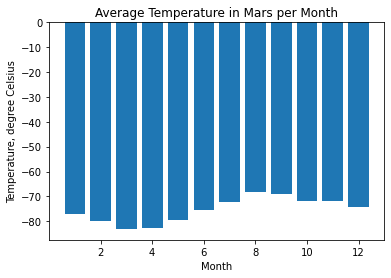

In [20]:
# Plot the average minimum temperature, in Celsius on a single Martian day as a bar chart.

x = mean_temp_df["month"]
y = mean_temp_df["min_temp"]

plt.bar(x,y)

plt.title("Average Temperature in Mars per Month")
plt.xlabel("Month")
plt.ylabel("Temperature, degree Celsius")

plt.show()

Q4: Which months have the lowest and the highest atmospheric pressure on Mars? 
    Get the answer by averaging the daily atmospheric pressure of all the months.

In [21]:
# Create a new data frame of month and pressure

pressure_df = temp_df[['month', 'pressure']].copy()
pressure_df.head()

,month,pressure
0,6,739.0
1,6,740.0
2,6,741.0
3,6,732.0
4,6,740.0


In [22]:
# Groupby month to calculate the average daily atmospheric pressure of all the months

mean_pressure_df = pressure_df.groupby("month", as_index=False)['pressure'].mean()
mean_pressure_df

,month,pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047
5,6,745.054422
6,7,795.105634
7,8,873.829787
8,9,913.305970
9,10,887.312500


In [23]:
# Sort presssure column in ascending order to determine lowest and highest atmospheric pressure 

mean_pressure_df.sort_values("pressure", ascending=True)

,month,pressure
5,6,745.054422
4,5,748.557047
6,7,795.105634
3,4,806.329897
11,12,842.156627
10,11,857.014493
0,1,862.488506
7,8,873.829787
2,3,877.322917
9,10,887.312500


#####   Q4 answer:  Month 6 has the average lowest atmospheric pressure (745.054422) and Month 9 has the average highest atmospheric pressure (913.305970) in Mars.

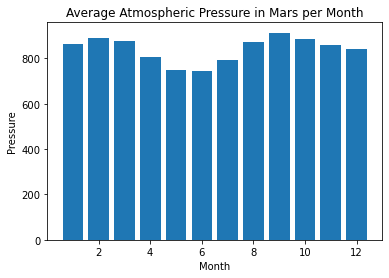

In [24]:
# Plot the results as a bar chart.

x = mean_pressure_df["month"]
y = mean_pressure_df["pressure"]

plt.bar(x,y)

plt.title("Average Atmospheric Pressure in Mars per Month")
plt.xlabel("Month")
plt.ylabel("Pressure")

plt.show()


Q5: About how many terrestrial (Earth) days exist in a Martian year?
    That is, in the time that Mars circles the Sun once, how many days elapse on Earth?
    Visually estimate the result by plotting the daily minimum temperature.

In [25]:
# Create a new dataframe of terrestrial date and minimum temperature

date_df = temp_df[['terrestrial_date', 'min_temp']].copy()
date_df


,terrestrial_date,min_temp
0,2012-08-16,-75.0
1,2012-08-17,-76.0
2,2012-08-18,-76.0
3,2012-08-19,-74.0
4,2012-08-20,-74.0
...,...,...
1862,2018-02-23,-78.0
1863,2018-02-24,-77.0
1864,2018-02-25,-76.0
1865,2018-02-26,-77.0


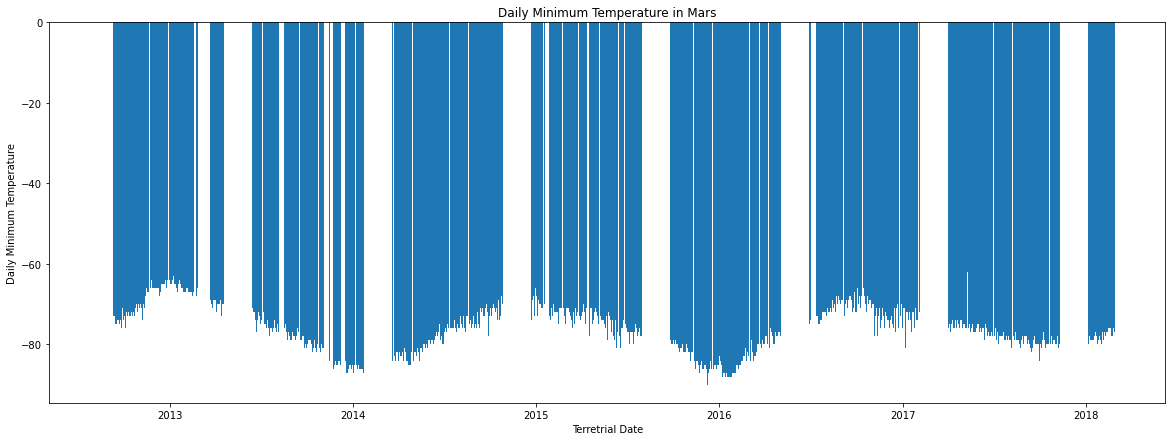

In [26]:
# Plot the results as a bar chart.

x = date_df["terrestrial_date"]
y = date_df["min_temp"]

plt.rcParams["figure.figsize"] = (20, 7)
plt.bar(x,y)

plt.title("Daily Minimum Temperature in Mars")
plt.xlabel("Terretrial Date")
plt.ylabel("Daily Minimum Temperature")

plt.show()

#####   Q5 answer:  There are 1,867 Earth days in the data frame and the data collected corresponds to about 12 Martian months. If a Martian year is composed of 12 Martian months, therefore, a Martian year has approximately 1,867 Earth days.

In [27]:
# Export the DataFrame to a CSV file.

temp_df.to_csv("mars_temp.csv")
